In [1]:
import os
from collections import defaultdict

import matplotlib.pyplot as plt
import matplotlib_inline
import pandas as pd
import numpy as np
from matplotlib import tri

#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [2]:
circle_radius = 0.01
cmap = "jet"

Re = [0.1, 1, 10, 100]

In [3]:
def get_data(loc, Re):
    flow_data = np.loadtxt(loc+f"/FFF_re_{Re}.txt", comments="%", delimiter=",").T
    Re=0.1 if Re=="0_1" else int(Re)
    _, x, y, U, uz, ur, _, _ = flow_data

    return x, y, ur, uz, Re

In [4]:
def get_full(x, y, u1, u2):
    non_zero_idx = np.where(y != 0.0)

    x_full = np.concatenate((x[non_zero_idx], x))
    y_full = np.concatenate((-y[non_zero_idx], y))
    
    u1_full = np.concatenate((u1[non_zero_idx], u1)) 
    u2_full = np.concatenate((u2[non_zero_idx], u2)) 
    
    return x_full, y_full, u1_full, u2_full

In [5]:
def plot_data(x_full, y_full, data, component=None, cmap="jet", lims=((-0.2,0.5),(-0.2,0.2)), alt_lims=((-0.05,0.05),(-0.02,0.02)), Re=None, save=False,
              file=None, font_and_labelsize=15):
    mask = (x_full >= lims[0][0]) & (x_full <= lims[0][1]) & (y_full >= lims[1][0]) & (y_full <= lims[1][1])


    xlim = lims[0]
    ylim = lims[1]

    xlim_alt = alt_lims[0]
    ylim_alt = alt_lims[1]
    
    if alt_lims is not None:
        x_min = alt_lims[0][0]
        x_max = alt_lims[0][1]
        y_min = alt_lims[1][0]
        y_max = alt_lims[1][1]
        mask_new = (x_full >= x_min) & (x_full <= x_max) & (y_full >= y_min) & (y_full <= y_max)
        if np.any(mask_new):
            local_min_2, local_max_2 = data[mask_new].min(), data[mask_new].max()

    if np.any(mask):
        local_min, local_max = data[mask].min(), data[mask].max()
    else:
        local_min, clocal_max = data.min(), data.max()

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
    ax = np.atleast_1d(ax)

    plot0 = ax[0].tripcolor(x_full, y_full, data, cmap=cmap,
                            vmin=local_min, vmax=local_max)
    ax[0].add_patch(plt.Circle((0, 0), circle_radius, color="w", fill=True, linewidth=2))
    ax[0].set_title(component + f" (ANSYS, Re$^*$={Re})", fontsize=font_and_labelsize)
    ax[0].set_ylabel("$z$", rotation=0, fontsize=font_and_labelsize)
    ax[0].set_xlabel("$r$", fontsize=font_and_labelsize)
    ax[0].set_aspect("equal")
    ax[0].set_xlim(xlim)
    ax[0].set_ylim(ylim)
    cax0 = fig.add_axes([ax[0].get_position().x1+0.01, ax[0].get_position().y0,
                         0.01, ax[0].get_position().height])
    cbar = fig.colorbar(plot0, ax=ax[0], cax=cax0)
    cbar.ax.tick_params(labelsize=font_and_labelsize)
    ax[0].tick_params(axis='both', which='major', labelsize=font_and_labelsize)

    plot1 = ax[1].tripcolor(x_full, y_full, data, cmap=cmap,
                            vmin=local_min_2, vmax=local_max_2)
    ax[1].add_patch(plt.Circle((0, 0), circle_radius, color="w", fill=True, linewidth=2))
    ax[1].set_title(component + f" (ANSYS, Re$^*$={Re})", fontsize=font_and_labelsize)
    ax[1].set_xlabel("$z$", fontsize=font_and_labelsize)
    ax[1].set_aspect("equal")
    ax[1].set_xlim(xlim_alt)
    ax[1].set_ylim(ylim_alt)
    cax1 = fig.add_axes([ax[1].get_position().x1+0.01, ax[1].get_position().y0,
                         0.01, ax[1].get_position().height])
    cbar = fig.colorbar(plot1, ax=ax[1], cax=cax1)
    cbar.ax.tick_params(labelsize=font_and_labelsize)
    ax[1].tick_params(axis='both', which='major', labelsize=font_and_labelsize)

    if save:
        plt.savefig(file, bbox_inches="tight")
    plt.show()

In [6]:
directory = "./HB/"
plt_dir = directory+"./plots/"
os.makedirs(plt_dir, exist_ok=True)

# Viscoplastic Fluid (Re = 0.1, 1, 10, 100)

# Re = 0.1

In [9]:
x, y, ur, uz, Re = get_data(directory, "0_1")
x_full, y_full, ur_full, uz_full = get_full(x, y, ur, uz)

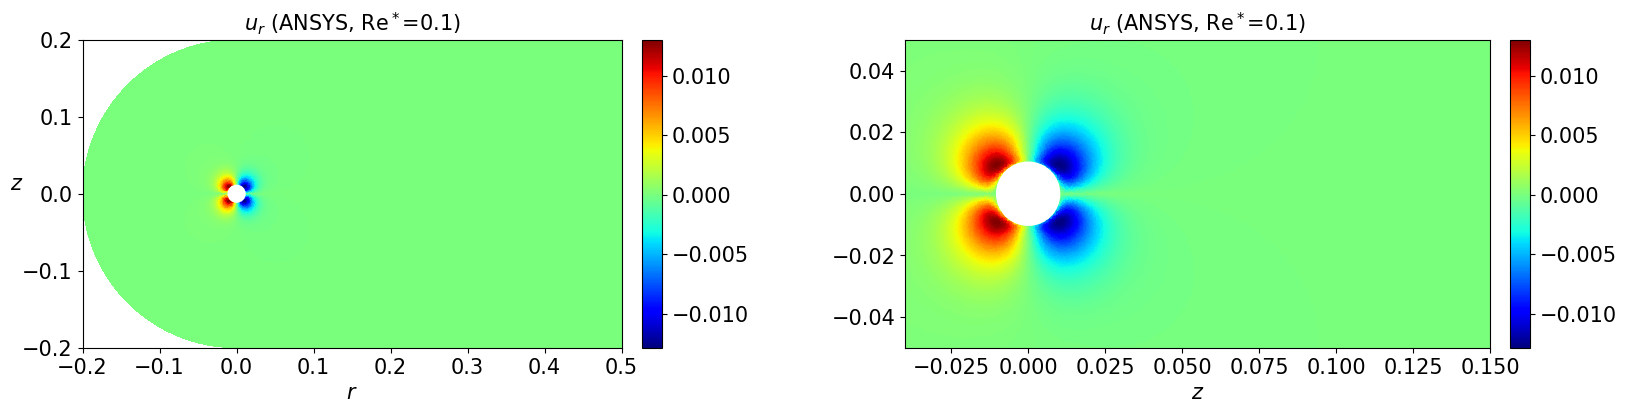

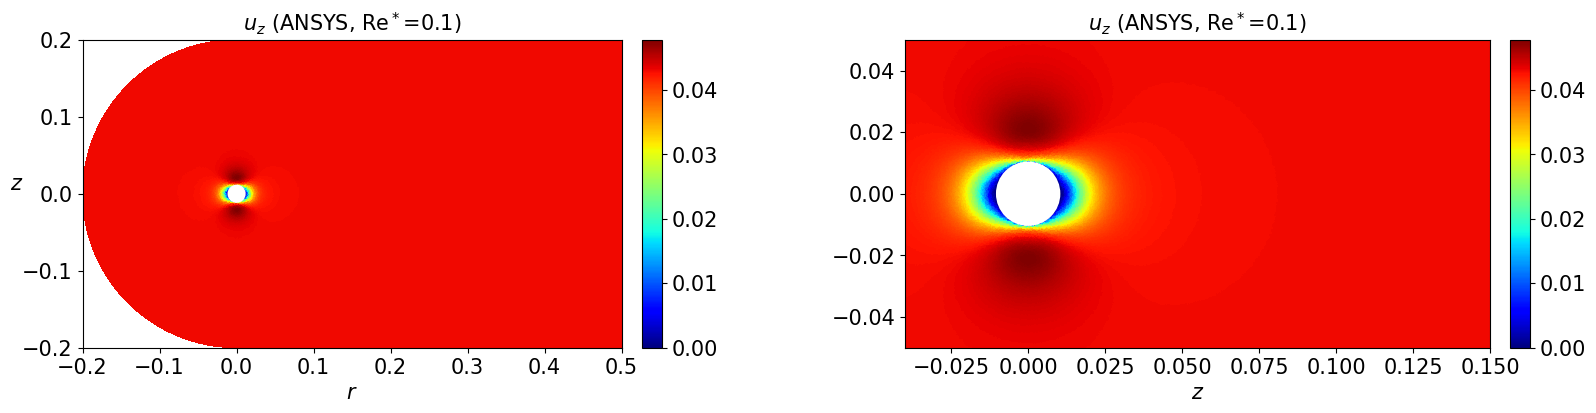

In [10]:
plot_data(x_full, y_full, ur_full, component="$u_r$", alt_lims=((-0.04,0.15), (-0.05,0.05)), Re=Re, save=True, file=plt_dir+f"/ur_{Re}.png")
plot_data(x_full, y_full, uz_full, component="$u_z$", alt_lims=((-0.04,0.15), (-0.05,0.05)), Re=Re, save=True, file=plt_dir+f"/uz_{Re}.png")

# Re = 1

In [12]:
x, y, ur, uz, Re = get_data(directory, "1")
x_full, y_full, ur_full, uz_full = get_full(x, y, ur, uz)

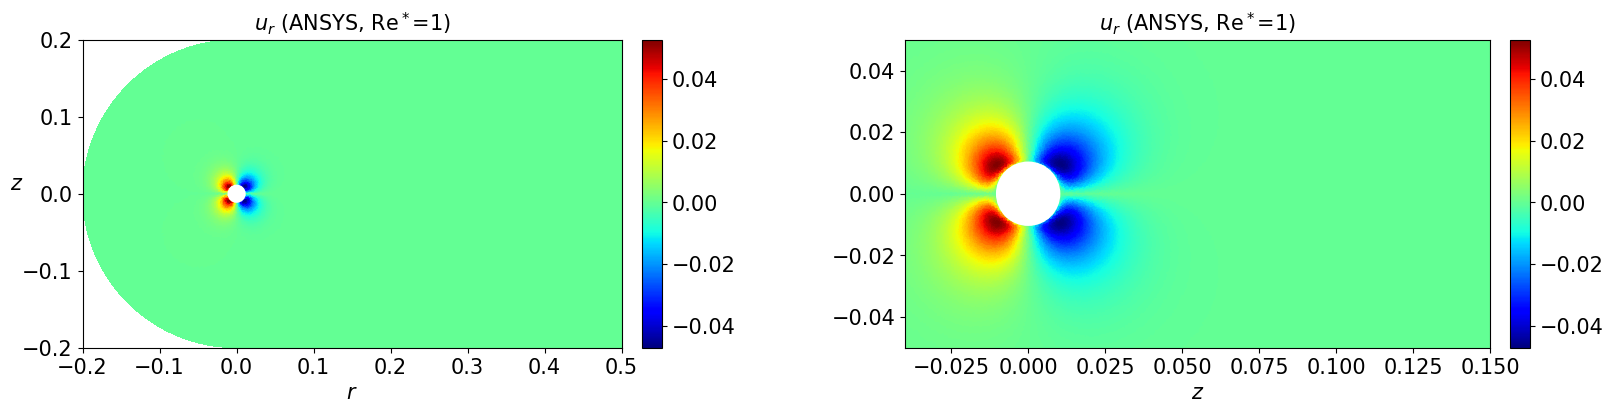

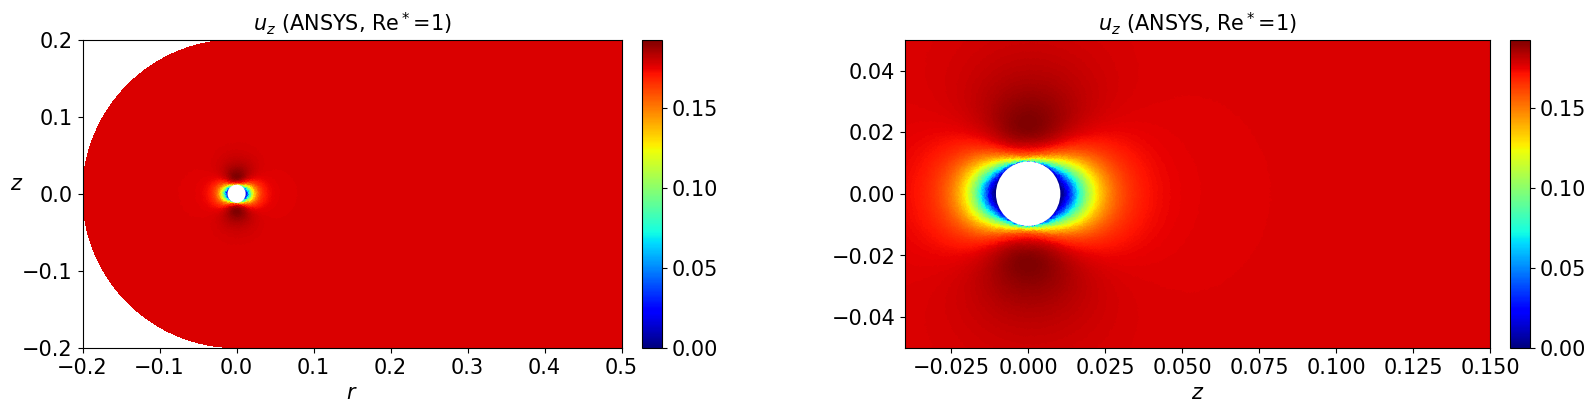

In [13]:
plot_data(x_full, y_full, ur_full, component="$u_r$", alt_lims=((-0.04,0.15), (-0.05,0.05)), Re=Re, save=True, file=plt_dir+f"/ur_{Re}.png")
plot_data(x_full, y_full, uz_full, component="$u_z$", alt_lims=((-0.04,0.15), (-0.05,0.05)), Re=Re, save=True, file=plt_dir+f"/uz_{Re}.png")

# Re = 10

In [15]:
x, y, ur, uz, Re = get_data(directory, "10")
x_full, y_full, ur_full, uz_full = get_full(x, y, ur, uz)

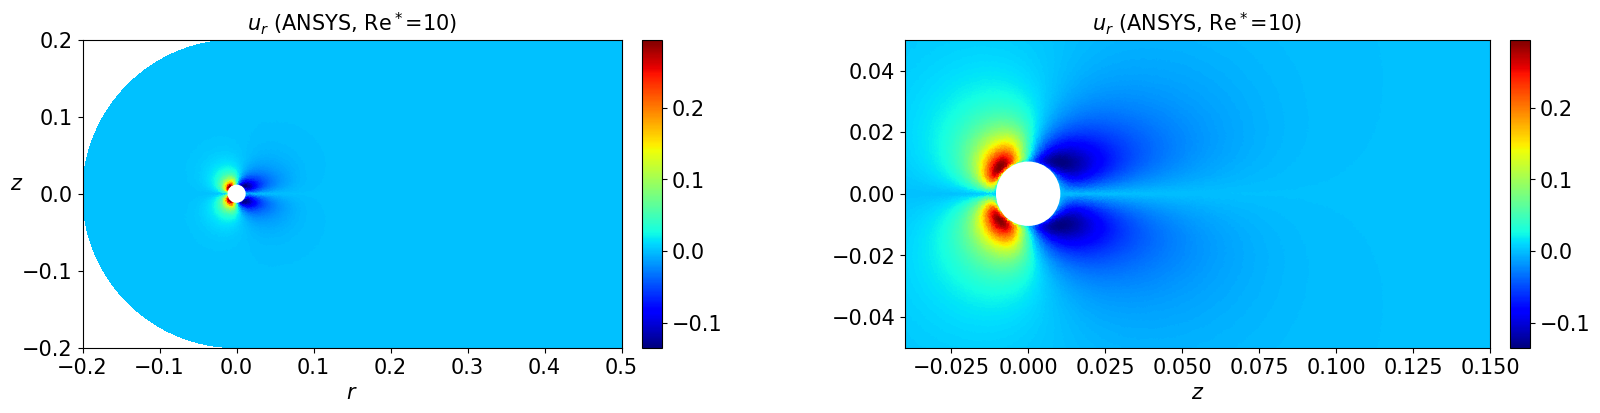

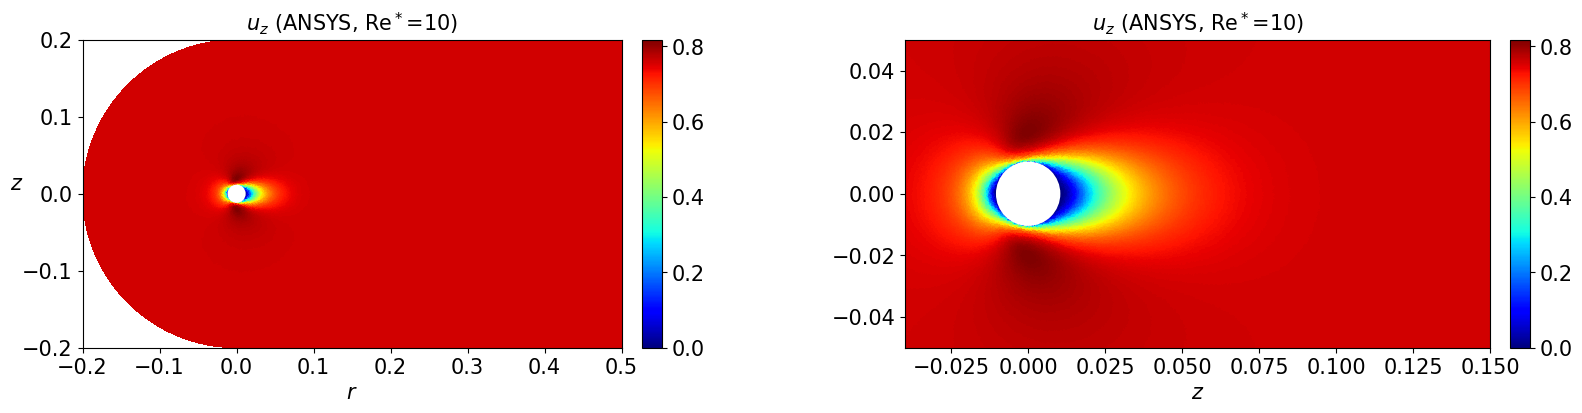

In [16]:
plot_data(x_full, y_full, ur_full, component="$u_r$", alt_lims=((-0.04,0.15), (-0.05,0.05)), Re=Re, save=True, file=plt_dir+f"/ur_{Re}.png")
plot_data(x_full, y_full, uz_full, component="$u_z$", alt_lims=((-0.04,0.15), (-0.05,0.05)), Re=Re, save=True, file=plt_dir+f"/uz_{Re}.png")

# Re = 100

In [18]:
x, y, ur, uz, Re = get_data(directory, "100")
x_full, y_full, ur_full, uz_full = get_full(x, y, ur, uz)

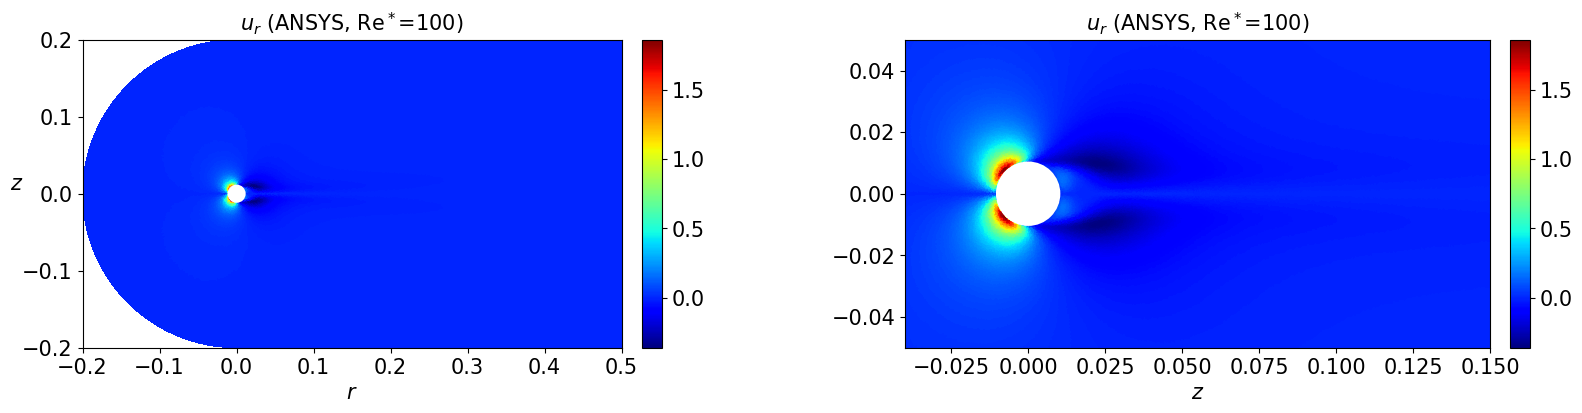

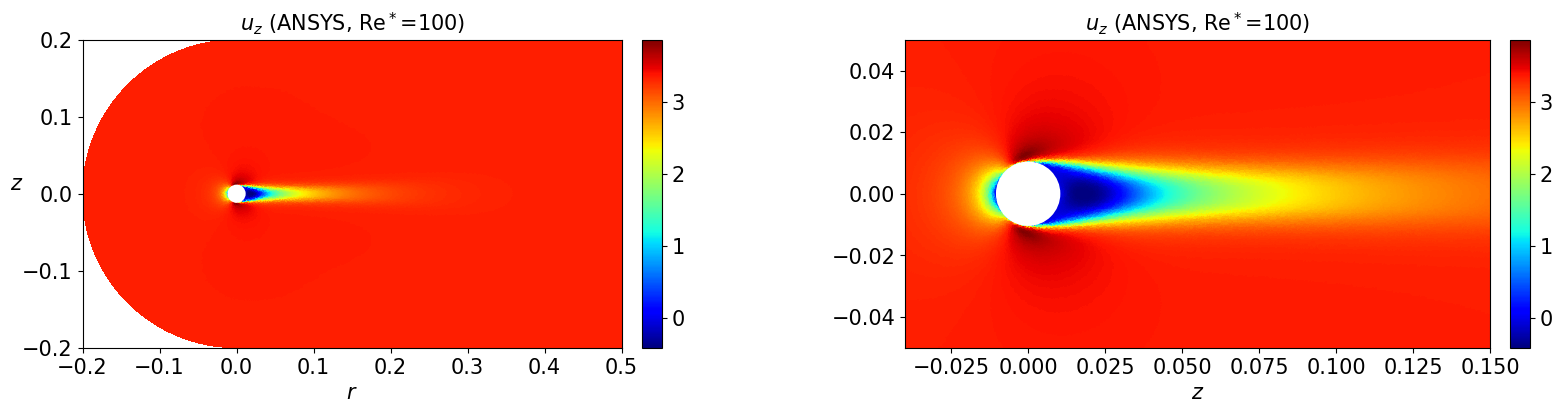

In [19]:
plot_data(x_full, y_full, ur_full, component="$u_r$", alt_lims=((-0.04,0.15), (-0.05,0.05)), Re=Re, save=True, file=plt_dir+f"/ur_{Re}.png")
plot_data(x_full, y_full, uz_full, component="$u_z$", alt_lims=((-0.04,0.15), (-0.05,0.05)), Re=Re, save=True, file=plt_dir+f"/uz_{Re}.png")

# Drag

In [21]:
Cd = np.array([384.4116284, 38.08198965, 4.050316132, 0.689860874])
Q_star = 10. ** np.arange(-2, 2)

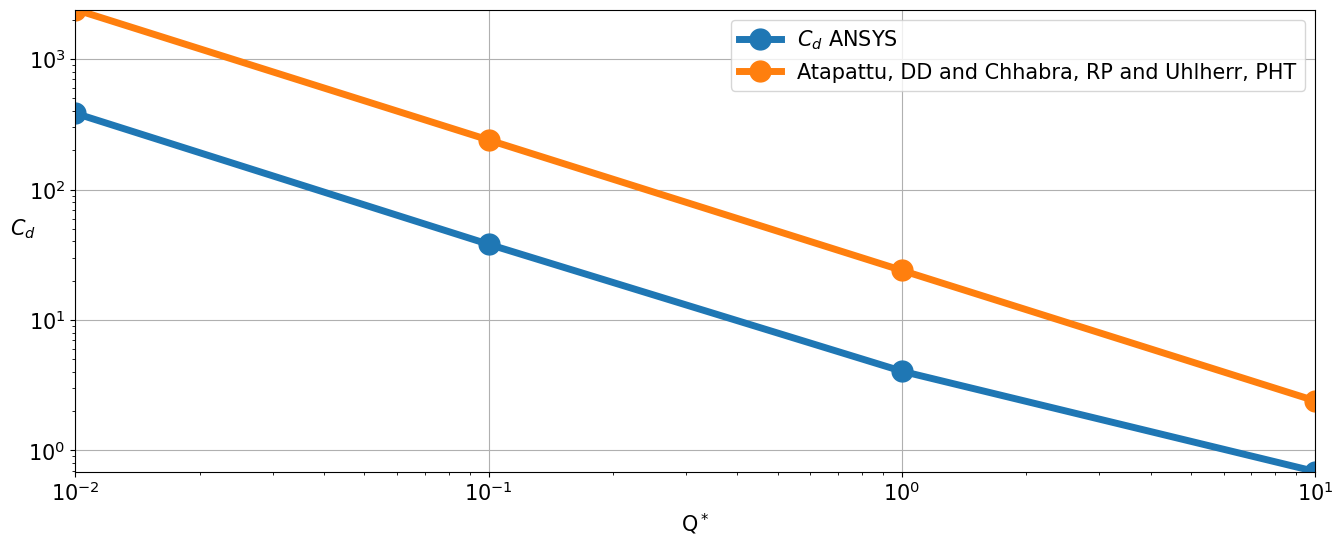

In [22]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(Q_star, Cd, "-o", label="$C_d$ ANSYS", lw=5, ms=15)
ax.plot(Q_star, 24/Q_star , "-o", label="Atapattu, DD and Chhabra, RP and Uhlherr, PHT", lw=5, ms=15)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Q$^*$", fontsize=15)
ax.set_ylabel("$C_d$", rotation=0, fontsize=15)
plt.legend(fontsize=15)
ax.grid(True)
ax.set_xlim(Q_star.min(), Q_star.max())
ax.set_ylim(Cd.min(), (24/Q_star).max())
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig(plt_dir+"/drag.png")
plt.show()

# Streamlines

In [24]:
# streams = [streamlines1, streamlines2, streamlines3, streamlines4]

# fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,8))
# ax = ax.flatten()
# for i, (rey, streams) in enumerate(zip(reynolds, streams)):
#     df = pd.DataFrame(streams, columns=["r", "z", "streamline"])

#     for stream, group in df.groupby("streamline"):
#         ax[i].plot(group['z'], group['r'], c="k", lw=1)
#     ax[i].add_patch(plt.Circle((0, 0), circle_radius, color="k", fill=True, linewidth=2))
#     ax[i].set_xlim(-0.03, 0.05)
#     ax[i].set_ylim(0, 0.03)
#     ax[i].set_aspect("equal")
#     ax[i].set_title(f"Re = {rey}", fontsize=15)
#     ax[i].set_xlabel("$z$", fontsize=15)
#     if i in (0,2): ax[i].set_ylabel("$r$", rotation=0, labelpad=10, fontsize=15)
#     ax[i].tick_params(axis='both', which='major', labelsize=15)
# plt.savefig("./plots/streamlines.png", bbox_inches="tight")
# plt.show()

# Mesh

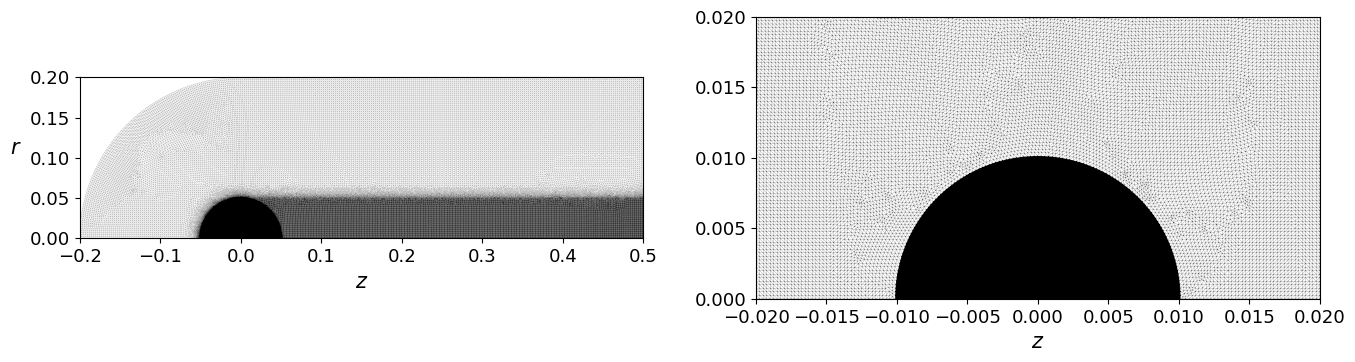

In [26]:
triang = tri.Triangulation(x, y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
ax[0].triplot(triang, lw=0.05, c="k")
ax[0].add_patch(plt.Circle((0, 0), circle_radius, color="k", fill=True, linewidth=1))

ax[1].triplot(triang, lw=0.1, c="k")
ax[1].add_patch(plt.Circle((0, 0), circle_radius, color="k", fill=True, linewidth=1))

ax[0].set_ylim(y.min(), y.max())
ax[0].set_xlim(x.min(), x.max())
ax[0].set_aspect("equal")
ax[0].set_xlabel("$z$", fontsize=15)
ax[0].set_ylabel("$r$", rotation=0, labelpad=10, fontsize=15)
ax[0].tick_params(axis='both', which='major', labelsize=13)

ax[1].set_ylim(0.0, 0.02)
ax[1].set_xlim(-0.02, 0.02)
ax[1].set_aspect("equal")
ax[1].set_xlabel("$z$", fontsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=13)
plt.savefig(plt_dir+"/mesh.png", bbox_inches="tight")
plt.show()